In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from utils import label_data, get_data

In [4]:
data_df = label_data(35)

In [5]:
data_df.columns


Index(['C_Active(g)', 'L_Active(g)', 'itp_F0(Hz)', 'itp_Po(dB)', 'itp_Temp(c)',
       'itp_HR(bpm)', 'itp_RR(bpm)', 'itp_HRV', 'pain_score', 'acc_score',
       'hr_score', 'rr_score', 'vital_score', 'score_sum'],
      dtype='object')

In [7]:
data_df

,C_Active(g),L_Active(g),itp_F0(Hz),itp_Po(dB),itp_Temp(c),itp_HR(bpm),itp_RR(bpm),itp_HRV,pain_score,acc_score,hr_score,rr_score,vital_score,score_sum
time(s),,,,,,,,,,,,,,
62.443528,0.001406,0.061277,0.0,-28.145029,0.425255,47.13582,10.711266,0.039625,0.0,0.0,0.0,0.0,0.0,0.0
62.543528,0.001444,0.061277,0.0,-28.170064,0.425885,47.13648,10.657346,0.039622,0.0,0.0,0.0,0.0,0.0,0.0
62.643528,0.001482,0.061277,0.0,-28.195100,0.426515,47.01080,10.603426,0.039726,0.0,0.0,0.0,0.0,0.0,0.0
62.743528,0.001520,0.061277,0.0,-28.220135,0.427145,46.88512,10.565401,0.040094,0.0,0.0,0.0,0.0,0.0,0.0
62.843528,0.001558,0.061277,0.0,-28.228293,0.427775,46.75944,10.623465,0.040462,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727.843500,0.000678,0.011583,0.0,-29.249780,-0.005646,20.05279,0.457137,0.096377,0.0,0.0,1.0,0.0,1.0,1.0
2727.943500,0.000656,0.010538,0.0,-29.247171,-0.005653,19.93573,0.410049,0.096934,0.0,0.0,1.0,0.0,1.0,1.0
2728.043500,0.000634,0.009493,0.0,-29.244562,-0.005660,19.93573,0.362961,0.097490,0.0,0.0,1.0,0.0,1.0,1.0


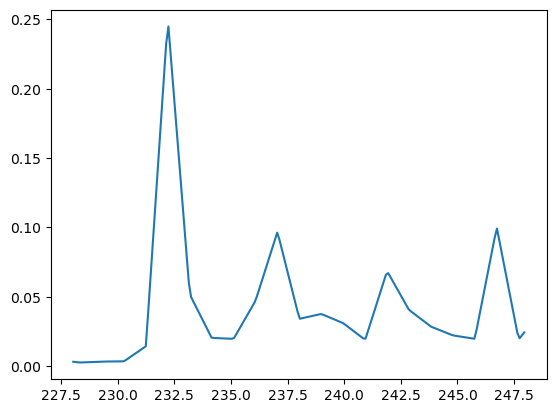

In [17]:
plt.plot(data_df['L_Active(g)'].loc[228:248])


In [3]:
def plot_score(s):
    data_path = f'/Users/shiyuanduan/Documents/PainStudy/Pain_Data_w_Freq/{s}_Summary.csv'
    df = pd.read_csv(data_path)

    df = label_pain(df)
    df_resample = df.rolling(10, step=10).max()
    fig, axs = plt.subplots(2, figsize=(20, 6))
    axs[0].scatter(df_resample.index, df_resample['itp_F0(Hz)'], marker='x', s=15)
    axs[0].set_title('Vocal Freq [Hz]')
    axs[1].plot(df_resample['pain_score'])
    axs[1].set_title('Pain Score')
    axs[-1].set_xlabel('Time [ms]', fontsize=16)
    fig.suptitle(f'Subject {s}', fontsize=16)

    output_folder = '/Users/shiyuanduan/Documents/PainStudy/Pain Score Result'
    fig.savefig(f'{output_folder}/Subject_{s}_Plot.png')
    plt.show()

In [4]:
for i in range(1, 37):
    if i == 11: continue # subject 11 does not exist
    result = get_data(i)
    start, end = result['lab_draw_start'], result['lab_draw_end']
    data_df = label_data(i)
    max_score = data_df[start:end]['score_sum'].max()
    print(f'subject:{i} max pain: {max_score}')

subject:1 max pain: 2.0
subject:2 max pain: 2.0
subject:3 max pain: 2.0
subject:4 max pain: 5.0
subject:5 max pain: 2.0
subject:6 max pain: 0.0
subject:7 max pain: 4.0
subject:8 max pain: 2.0
subject:9 max pain: 4.0
subject:10 max pain: 0.0
subject:12 max pain: 4.0
subject:13 max pain: 4.0
subject:14 max pain: 1.0
subject:15 max pain: 5.0
subject:16 max pain: 2.0
subject:17 max pain: 2.0
subject:18 max pain: 3.0
subject:19 max pain: 4.0
subject:20 max pain: 1.0
subject:21 max pain: 2.0
